In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = "C:\\Users\\LEGION\\Documents\\My Document\\BTEC Study Case\\6th semester\\Computing Project\\project\\house_hiring\\data\\"

In [3]:
df_hcm = pd.read_csv(path + 'hcm.csv')

In [4]:
df_hcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      9733 non-null   object 
 1   price      9733 non-null   float64
 2   published  9733 non-null   object 
 3   acreage    9733 non-null   float64
 4   address    9733 non-null   object 
dtypes: float64(2), object(3)
memory usage: 380.3+ KB


In [5]:
df_hcm.head()

,title,price,published,acreage,address
0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2.2,16/05/2022,20.0,"Lê Đình Cẩn, Phường Tân Tạo, Quận Bình Tân, Hồ..."
1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2.5,20/04/2022,20.0,"487/35/25 Đường Huỳnh Tấn Phát, Phường Tân Thu..."
2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3.5,10/05/2022,30.0,"Đường 10, Phường Tân Thuận Đông, Quận 7, Hồ Ch..."
3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1.5,05/05/2022,30.0,"283/15 Huỳnh Tấn Phát, Phường Tân Thuận Đông, ..."
4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3.5,05/01/2022,18.0,"Lê Văn Sỹ, Phường 14, Quận Phú Nhuận, Hồ Chí Minh"


# 1. Clean and Preprocess data

In [6]:
import re

In [7]:
def address_to_district(address):
    parts = address.split(',')
    if len(parts) >= 3:
        district = parts[-2].strip()
        if "Quận" in district or "Huyện" in district:
            district = district.split("Quận", 1)[-1].split("Huyện", 1)[-1].strip()
            return district
    return None

In [8]:
def address_to_ward(address):
    parts = address.split(',')
    if len(parts) >= 3:
        ward = parts[-3].strip()
        if "Phường" in ward or "Xã" in ward:
            ward = ward.split("Xã", 1)[-1].split("Phường", 1)[-1].strip()
            return ward
    return None

In [9]:
df_hcm.loc[:,'city'] = 'HCM'

In [10]:
df_hcm.loc[:,'district'] = df_hcm['address'].apply(address_to_district)

In [11]:
df_hcm['district'].unique()

array(['Bình Tân', '7', 'Phú Nhuận', '3', '8', '6', '4', '10', 'Nhà Bè',
       None, '11', '5', '05', 'Gò Vấp', 'Gò Vấp', '12', '1', '9',
       '9 (có thể đi xe buýt', 'Bình Thạnh', 'Tân Bình', 'Tân Phú',
       'Củ Chi', 'Bình Chánh', '2', 'Củ aChi', 'Thủ Đức', 'Hóc Môn'],
      dtype=object)

In [12]:
df_hcm = df_hcm[df_hcm['district'].notnull()]

In [13]:
df_hcm.loc[df_hcm['district'] == "9 (có thể đi xe buýt", 'district'] = '9'
df_hcm.loc[df_hcm['district'] == "05", 'district'] = '5'
df_hcm.loc[df_hcm['district'] == "Củ aChi", 'district'] = 'Củ Chi'
df_hcm.loc[df_hcm['district'] == "Gò Vấp", 'district'] = 'Gò Vấp'

In [14]:
df_hcm['district'].unique()

array(['Bình Tân', '7', 'Phú Nhuận', '3', '8', '6', '4', '10', 'Nhà Bè',
       '11', '5', 'Gò Vấp', '12', '1', '9', 'Bình Thạnh', 'Tân Bình',
       'Tân Phú', 'Củ Chi', 'Bình Chánh', '2', 'Thủ Đức', 'Hóc Môn'],
      dtype=object)

In [15]:
df_hcm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9582 entries, 0 to 9732
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      9582 non-null   object 
 1   price      9582 non-null   float64
 2   published  9582 non-null   object 
 3   acreage    9582 non-null   float64
 4   address    9582 non-null   object 
 5   city       9582 non-null   object 
 6   district   9582 non-null   object 
dtypes: float64(2), object(5)
memory usage: 598.9+ KB


In [16]:
df_hcm = df_hcm[df_hcm['district'].notnull()]

In [17]:
df_hcm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9582 entries, 0 to 9732
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      9582 non-null   object 
 1   price      9582 non-null   float64
 2   published  9582 non-null   object 
 3   acreage    9582 non-null   float64
 4   address    9582 non-null   object 
 5   city       9582 non-null   object 
 6   district   9582 non-null   object 
dtypes: float64(2), object(5)
memory usage: 598.9+ KB


## 2.2. Split to wards of district

In [18]:
df_hcm.head()

,title,price,published,acreage,address,city,district
0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2.2,16/05/2022,20.0,"Lê Đình Cẩn, Phường Tân Tạo, Quận Bình Tân, Hồ...",HCM,Bình Tân
1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2.5,20/04/2022,20.0,"487/35/25 Đường Huỳnh Tấn Phát, Phường Tân Thu...",HCM,7
2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3.5,10/05/2022,30.0,"Đường 10, Phường Tân Thuận Đông, Quận 7, Hồ Ch...",HCM,7
3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1.5,05/05/2022,30.0,"283/15 Huỳnh Tấn Phát, Phường Tân Thuận Đông, ...",HCM,7
4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3.5,05/01/2022,18.0,"Lê Văn Sỹ, Phường 14, Quận Phú Nhuận, Hồ Chí Minh",HCM,Phú Nhuận


In [19]:
df_hcm.loc[:, 'ward'] = df_hcm['address'].apply(address_to_ward)

In [20]:
df_hcm.head()

,title,price,published,acreage,address,city,district,ward
0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2.2,16/05/2022,20.0,"Lê Đình Cẩn, Phường Tân Tạo, Quận Bình Tân, Hồ...",HCM,Bình Tân,Tân Tạo
1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2.5,20/04/2022,20.0,"487/35/25 Đường Huỳnh Tấn Phát, Phường Tân Thu...",HCM,7,Tân Thuận Đông
2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3.5,10/05/2022,30.0,"Đường 10, Phường Tân Thuận Đông, Quận 7, Hồ Ch...",HCM,7,Tân Thuận Đông
3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1.5,05/05/2022,30.0,"283/15 Huỳnh Tấn Phát, Phường Tân Thuận Đông, ...",HCM,7,Tân Thuận Đông
4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3.5,05/01/2022,18.0,"Lê Văn Sỹ, Phường 14, Quận Phú Nhuận, Hồ Chí Minh",HCM,Phú Nhuận,14


## 2.3. Split month

In [21]:
df_hcm['month'] = df_hcm['published'].str[3:5]

In [22]:
df_hcm['published'] = pd.to_datetime(df_hcm['published'], format='%d/%m/%Y', errors='coerce')

In [23]:
df_hcm['month'].unique()

array(['05', '04', '01', '11', '03', '07', '12', '10', '06', '08', '02',
       '09', 'gà', 'gi', ' n', 'iờ', 'hú'], dtype=object)

In [24]:
df_hcm = df_hcm[~df_hcm['month'].isin(['gà', 'gi', ' n', 'iờ', 'hú'])]

In [25]:
df_hcm = df_hcm[df_hcm['month'].notnull()]
print(df_hcm['month'].unique())

['05' '04' '01' '11' '03' '07' '12' '10' '06' '08' '02' '09']


In [26]:
df_hcm.to_csv('processed_data.csv', index = False)

# 3. Data Visualization

## 3.1. Scatter plot

In [27]:
def scatter(x,fig):
    plt.scatter(df_hcm[x],df_hcm['price'])
    plt.title(x+' vs price')
    plt.ylabel('price')
    plt.xlabel(x)
plt.figure(figsize=(10,12))

<Figure size 1000x1200 with 0 Axes>

<Figure size 1000x1200 with 0 Axes>

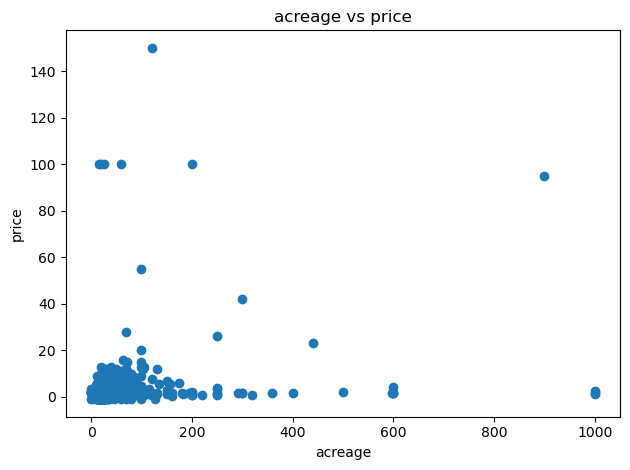

In [28]:
scatter('acreage',1)
plt.tight_layout()

## 3.2. Bar Chart

In [29]:
frame = df_hcm[['district', 'ward', 'price']]
bins = [1,2,3,4]
frame.head()

,district,ward,price
0,Bình Tân,Tân Tạo,2.2
1,7,Tân Thuận Đông,2.5
2,7,Tân Thuận Đông,3.5
3,7,Tân Thuận Đông,1.5
4,Phú Nhuận,14,3.5


In [30]:
def Analyst(df_a,col):
    temp = df_a.copy()
    table = df_a.groupby([col], observed=False)['price'].mean()
    temp = temp.merge(table.reset_index(), how='left',on=col)
    cars_bin=['Low','Medium','High']
    df_a.loc[:,'range'] = pd.cut(temp.loc[:,'price_y'],bins,right=False,labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df_a_1 = pd.DataFrame(df_a.groupby([col,'range'], observed=False)['price'].mean().unstack(fill_value=0))
    df_a_1.plot.bar()
    plt.title('house Range vs Price')
    plt.ylabel('million VND')
    plt.show()

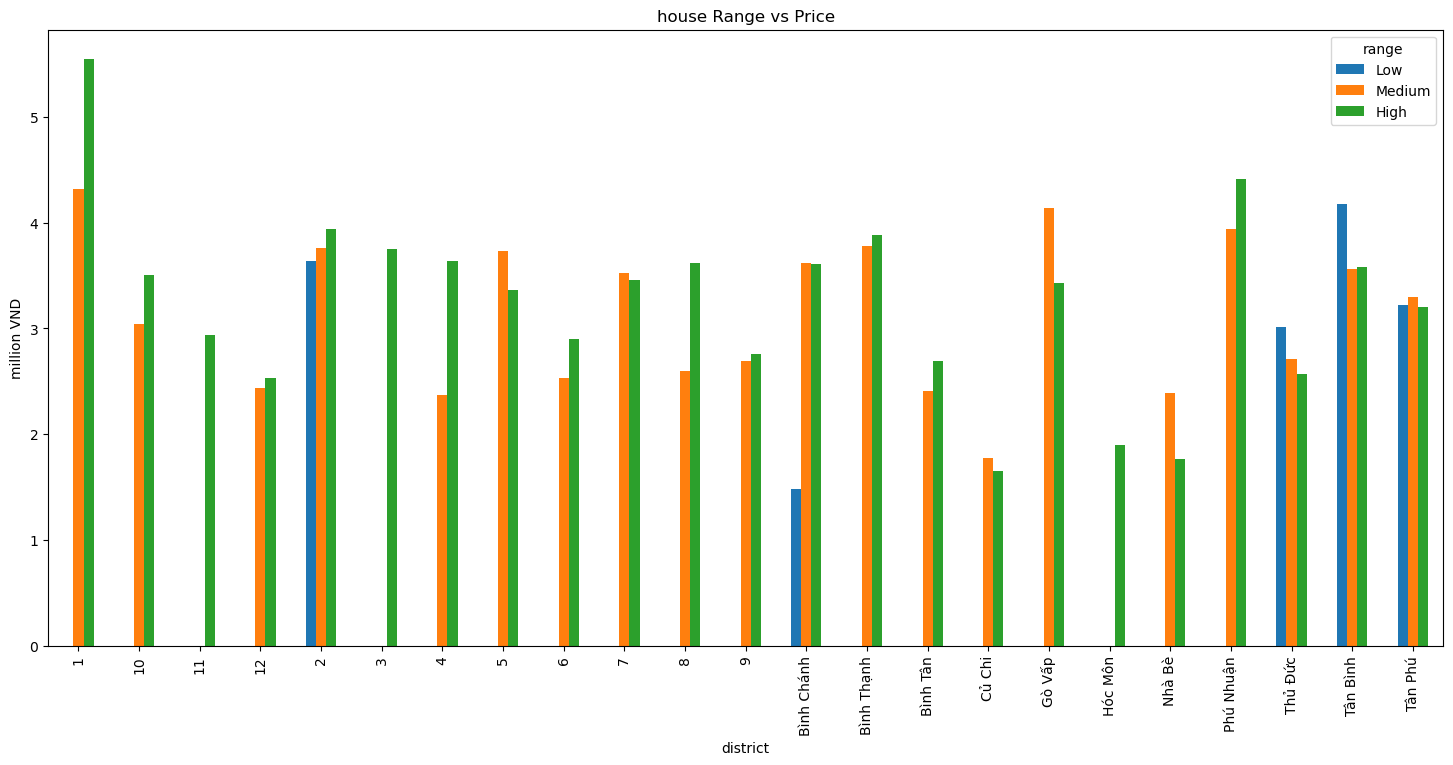

In [56]:
Analyst(frame,'district')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_25056\827428932.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month, rotation=90,size=8)


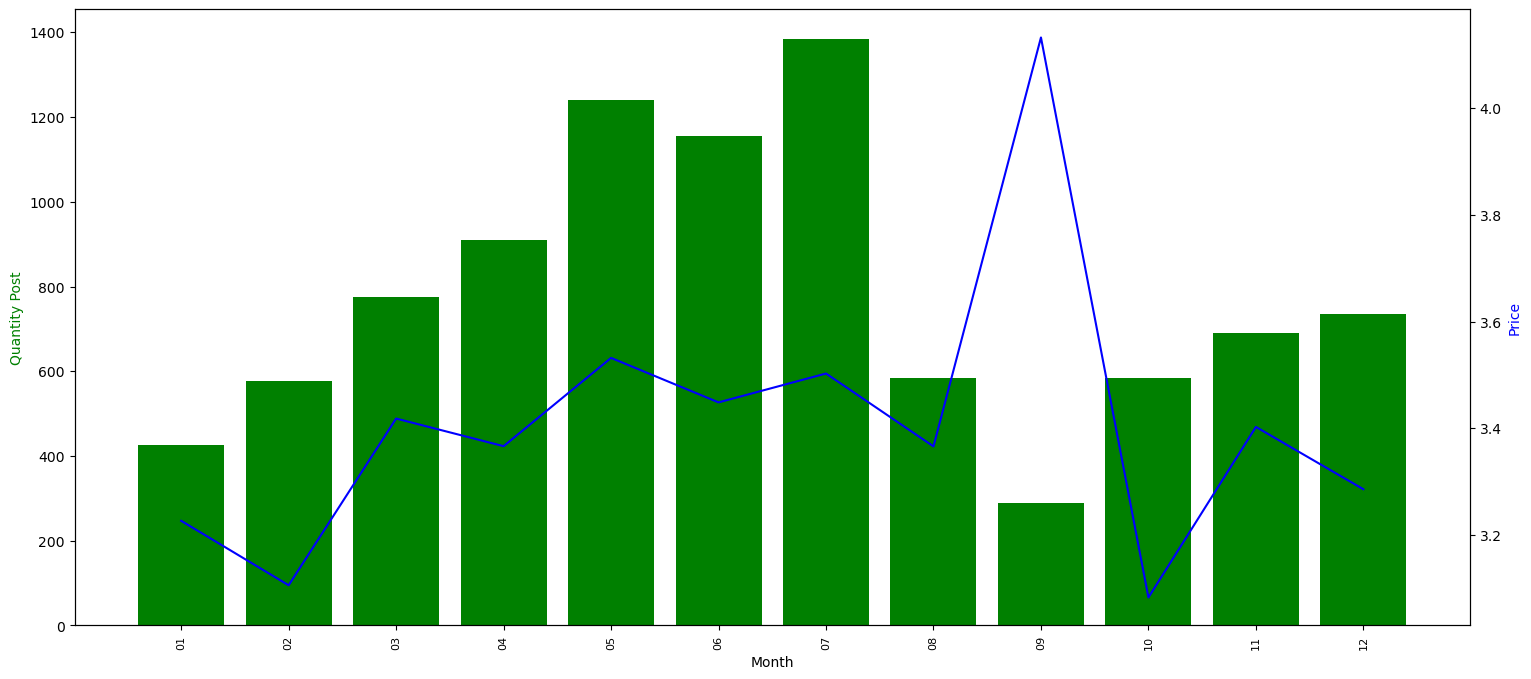

In [32]:
month_price = df_hcm.groupby('month')['price'].mean()
month_post = df_hcm.groupby('month')['title'].count()
month = [month for month, posts in month_price.items()]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(month, month_post, color='g')
ax2.plot(month, month_price, 'b-')

ax1.set_xticklabels(month, rotation=90,size=8)
ax1.set_xlabel('Month')
ax1.set_ylabel('Quantity Post', color='g')
ax2.set_ylabel('Price', color='b')

plt.show()

# 3. Prediction model

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 3.1. Feature selection

In [34]:
features = ["district" ,"acreage"]

## 3.2. Splitting data into X and Y

In [35]:
X = df_hcm[features]

In [36]:
y = df_hcm['price']

In [37]:
data_dummies = pd.get_dummies(X, drop_first=False)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed.head()

,acreage,district_1,district_10,district_11,district_12,district_2,district_3,district_4,district_5,district_6,...,district_Bình Thạnh,district_Bình Tân,district_Củ Chi,district_Gò Vấp,district_Hóc Môn,district_Nhà Bè,district_Phú Nhuận,district_Thủ Đức,district_Tân Bình,district_Tân Phú
0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
scaler = StandardScaler()
scaler.fit(data_preprocessed)

StandardScaler()

In [39]:
data_preprocessed = scaler.transform(data_preprocessed)
data_preprocessed

array([[-0.21403868, -0.20746548, -0.24360449, ..., -0.20997558,
        -0.25687138, -0.2132841 ],
       [-0.21403868, -0.20746548, -0.24360449, ..., -0.20997558,
        -0.25687138, -0.2132841 ],
       [ 0.12080254, -0.20746548, -0.24360449, ..., -0.20997558,
        -0.25687138, -0.2132841 ],
       ...,
       [-0.21403868, -0.20746548, -0.24360449, ..., -0.20997558,
        -0.25687138, -0.2132841 ],
       [ 0.12080254, -0.20746548, -0.24360449, ..., -0.20997558,
        -0.25687138, -0.2132841 ],
       [-0.48191165, -0.20746548, -0.24360449, ..., -0.20997558,
        -0.25687138, -0.2132841 ]])

In [40]:
print(X.shape)
print(y.shape)

(9354, 2)
(9354,)


In [41]:
X_train,X_test,y_train,y_test = train_test_split(data_preprocessed,y,test_size=0.2,random_state=365)

In [42]:
reg = LinearRegression().fit(X_train, y_train)

In [43]:
reg.predict(X_test)

array([3.82511978, 3.10417251, 4.23649673, ..., 5.76405411, 2.52919082,
       2.62294082])

In [44]:
Y_pre = reg.predict(X_test)

In [45]:
perc = np.abs((Y_pre - y_test)/y_test)
perc = perc.values*100

In [46]:
np.array([Y_pre, y_test, perc])

array([[  3.82511978,   3.10417251,   4.23649673, ...,   5.76405411,
          2.52919082,   2.62294082],
       [  7.        ,   2.5       ,   5.5       , ...,   2.        ,
          1.65      ,   2.6       ],
       [ 45.35543172,  24.16690056,  22.97278668, ..., 188.20270529,
         53.28429239,   0.8823394 ]])

In [47]:
data = {'predict price':Y_pre,
        'realistic price':y_test,
       '% deviation': perc}
A = pd.DataFrame(data)

In [48]:
B = A.sort_values(by=['% deviation'])
B

,predict price,realistic price,% deviation
9175,2.300217,2.3,0.009454
4051,4.096360,4.1,0.088780
4095,2.803391,2.8,0.121117
3783,3.204026,3.2,0.125813
539,3.404465,3.4,0.131338
...,...,...,...
1317,9.687424,1.5,545.828298
1001,3.645188,0.5,629.037628
938,3.735520,0.5,647.104034
950,3.735520,0.5,647.104034


## 3.3. Model evaluation

In [49]:
B['% deviation'].describe()

count    1871.000000
mean       42.731786
std        68.386825
min         0.009454
25%        11.378746
50%        23.935235
75%        41.954278
max       647.104034
Name: % deviation, dtype: float64

In [50]:
(sum((reg.predict(X_test) - y_test)**2)/len(y_test))**0.5

2.7275005288239633

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Y_pre)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.439259134734985


## 3.4. Encapsulate predict model

In [52]:
from joblib import dump
from joblib import load

model_file = 'linear_regression_model.joblib'
dump(reg, model_file)

data_dummies.to_csv('data_dummies.csv', index=False)


In [53]:
dummies_data = data_dummies = pd.read_csv('data_dummies.csv')
loaded_model = load('linear_regression_model.joblib')

In [54]:
def Predict_price(district, square):
    new_input = pd.DataFrame({'acreage': [square], 'district': [district]})
    district_enconder = 'district_'+district
    # One-hot encode the district feature
    new_input_dummies = pd.get_dummies(new_input, drop_first=True)
    new_input_dummies
    # Ensure the columns are consistent with the training data
    # Add missing district columns if necessary
    missing_cols = set(data_dummies.columns) - set(new_input_dummies.columns)
    for col in missing_cols:
        new_input_dummies[col] = 0
    new_input_dummies[district_enconder] = 1
    # Reorder the columns to match the order of the training data
    new_input_dummies = new_input_dummies[data_dummies.columns]
    new_input_dummies = scaler.transform(new_input_dummies)
    # Predict using the trained model
    Y_pred = loaded_model.predict(new_input_dummies)
    # Decode the predictions
    decoded_predictions = pd.DataFrame(Y_pred, columns=['Predicted_Price'])
    # Print the decoded predictions
    print(decoded_predictions)

In [55]:
Predict_price('Gò Vấp', 18)
Predict_price('Thủ Đức', 30)
Predict_price('Bình Thạnh', 20)
Predict_price('1', 15)

   Predicted_Price
0         3.168381
   Predicted_Price
0          2.69719
   Predicted_Price
0         3.797776
   Predicted_Price
0         4.437424
